<a href="https://colab.research.google.com/github/Sau1o/PIS/blob/main/Identificando_e_Contando_Objetos_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving imagem0riginal.png to imagem0riginal.png


Links da documentação oficial e material de apoio:  
[Thersholding - OTSU](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)  
[FindContours - cv2](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)  
[findContours - Medium](https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18)  
[findContours - Geeksforgeeks](https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/)  
[cv2.RETR_EXTERNAL](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html)  

In [10]:
#Função para facilitar a escrita nas imagem
def escreve(img, texto, cor=(255,0,0)):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, texto, (10,20), fonte, 0.5, cor, 0,cv2.LINE_AA)

In [3]:
#Carregamento da imagem
imgColorida = cv2.imread('/content/imagem0riginal.png')

In [ ]:
#se necessário, fazer o redimensionamento

In [4]:
#Passo 1: Conversão para tons de cinza
img = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)

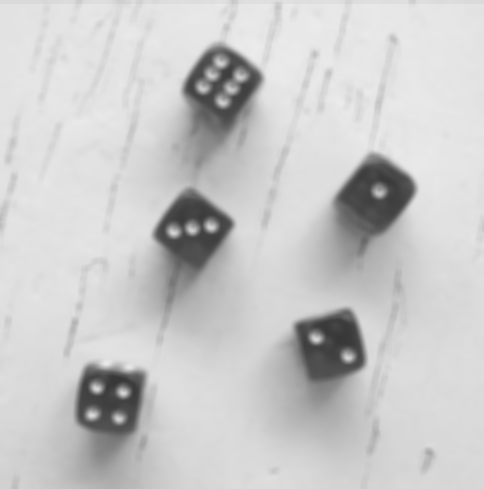

In [5]:
#Passo 2: Blur/Suavização da imagem
suave = cv2.blur(img, (7, 7))
cv2_imshow(suave)

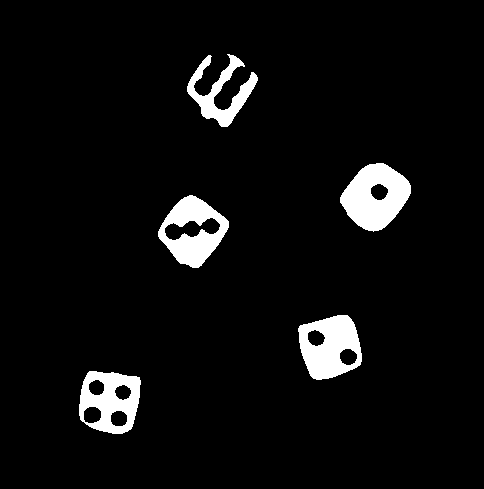

In [ ]:
ret,thresh1 = cv2.threshold(suave,100,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh1)

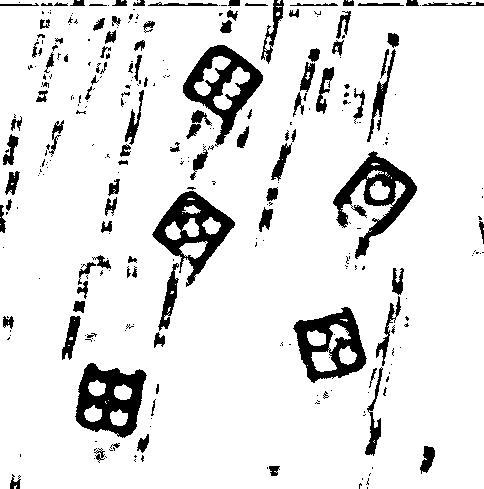

In [ ]:
th2 = cv2.adaptiveThreshold(suave,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
cv2_imshow(th2)

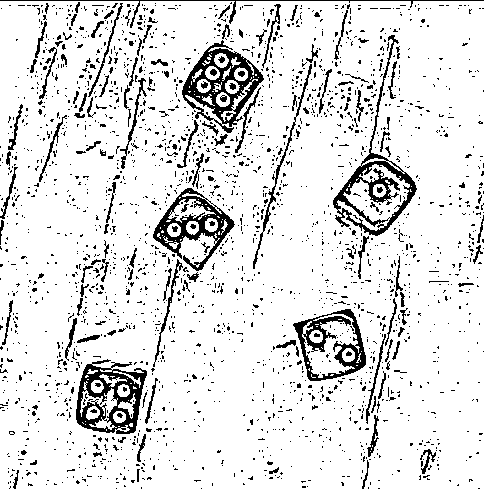

In [ ]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
cv2_imshow(th3)

155.0


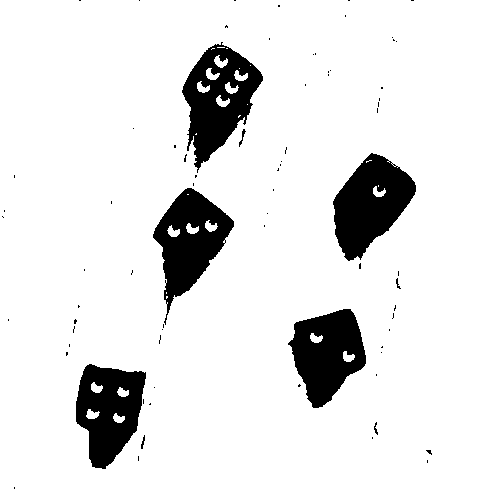

In [6]:
#Passo 3: Binarização resultando em pixels brancos e pretos
T,th2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
bin = suave.copy()
bin[bin > T] = 255
bin[bin < 255] = 0
bin = cv2.bitwise_not(bin)
print(T)
cv2_imshow(th2)

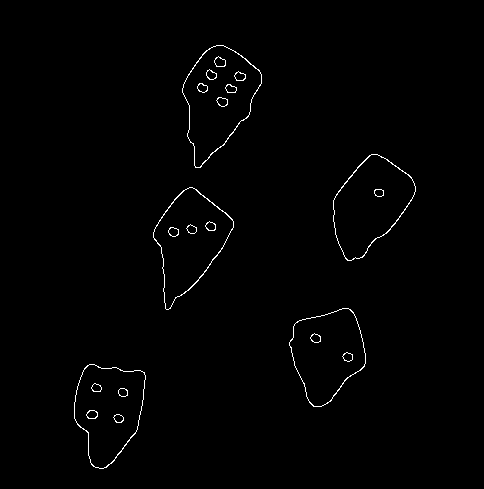

In [7]:
#Passo 4: Detecção de bordas com Canny
bordas = cv2.Canny(bin, 70, 150)
cv2_imshow(bordas)

In [8]:
#Passo 5: Identificação e contagem dos contornos da imagem
#cv2.RETR_EXTERNAL = conta apenas os contornos externos
(objetos, lx) = cv2.findContours(bordas.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
escreve(img, "Imagem em tons de cinza", 0)
escreve(suave, "Suavizacao com Blur", 0)
escreve(bin, "Binarizacao com Metodo Otsu", 255)
escreve(bordas, "Detector de bordas Canny", 255)
temp = np.vstack([np.hstack([img, suave]),np.hstack([bin, bordas])])

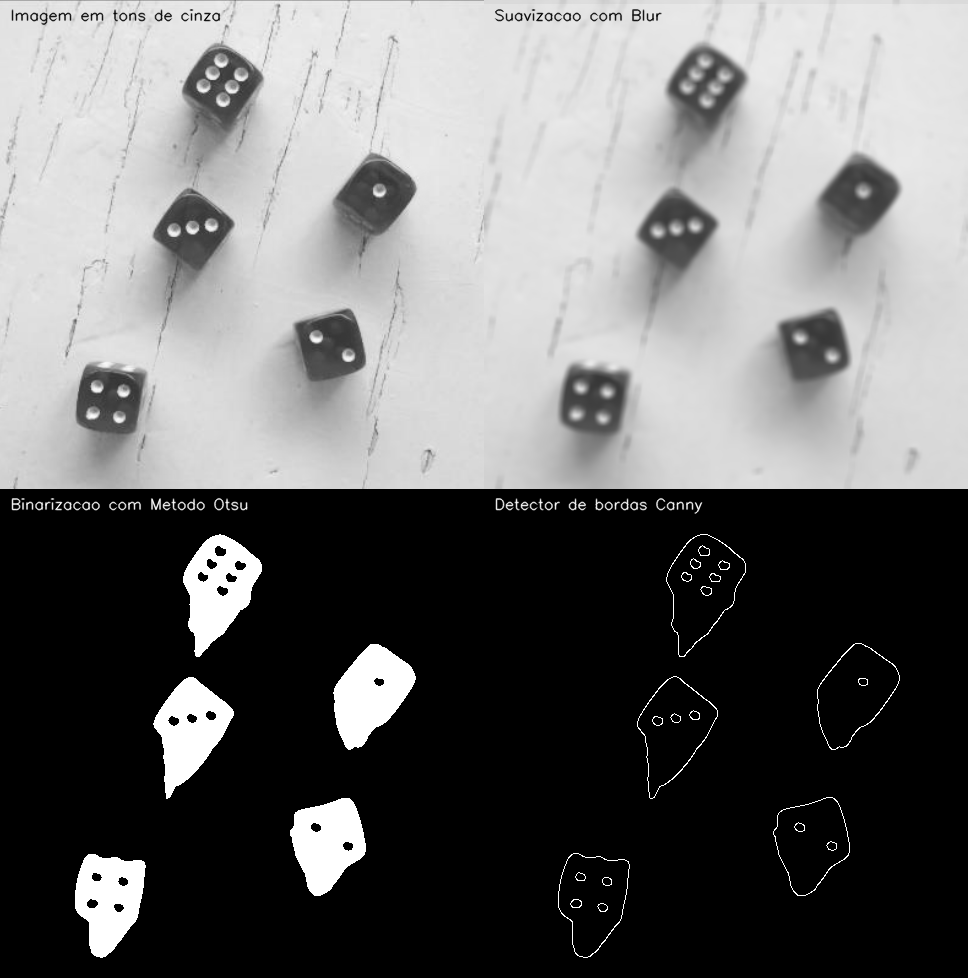

In [12]:
cv2_imshow(temp)

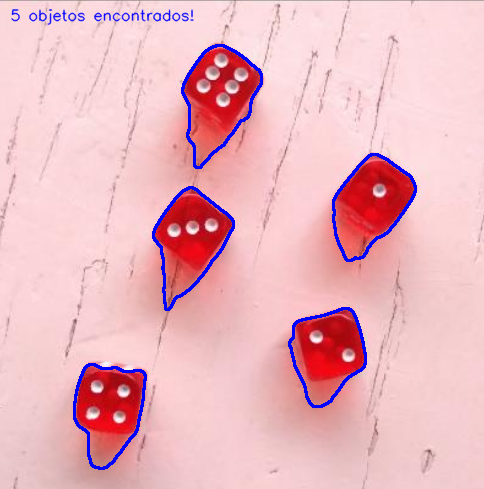

In [20]:
imgC2 = imgColorida.copy()

cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
escreve(imgC2, str(len(objetos))+" objetos encontrados!")
cv2_imshow(imgC2)

[Hough Gradient Method - cv2](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)  
[HoughCircles — Detecção de círculos em imagens com OpenCV e Python](https://medium.com/turing-talks/houghcircles-detec%C3%A7%C3%A3o-de-c%C3%ADrculos-em-imagens-com-opencv-e-python-2d229ad9d43b)

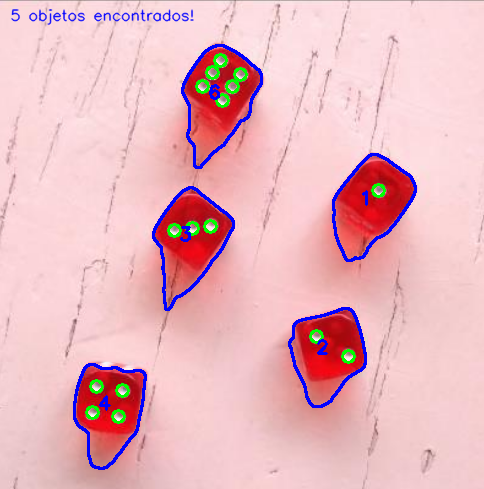

In [22]:
#Iterar sobre cada contorno (cada dado detectado)
total = []
for (i, c) in enumerate(objetos):
    # Criar uma máscara para isolar o dado
    mascara = np.zeros(img.shape, dtype="uint8")
    cv2.drawContours(mascara, [c], -1, 255, -1)

    # Extrair a região correspondente ao dado
    ROI = cv2.bitwise_and(img, img, mask=mascara)

    # Detectar círculos (pontos dos dados) usando HoughCircles
    circulos = cv2.HoughCircles(ROI, cv2.HOUGH_GRADIENT, 1, minDist=10,
                                param1=50, param2=10, minRadius=5, maxRadius=7)

    # Se círculos forem detectados
    if circulos is not None:
        circulos = np.round(circulos[0, :]).astype("int")
        num_pontos = len(circulos)  # Contagem de círculos
        total.append(num_pontos)

        # Desenhar os círculos e o número de pontos na imagem
        for (x, y, r) in circulos:
            cv2.circle(imgC2, (x, y), r, (0, 255, 0), 2)

        # Escrever o número de pontos no centro do dado
        M = cv2.moments(c)
        if M["m00"] > 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(imgC2, str(num_pontos), (cX - 10, cY),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Exibir o resultado com os contornos dos dados e o número de pontos
cv2_imshow(imgC2)

In [23]:
total

[4, 2, 3, 1, 6]

In [24]:
sum(total)

16